In [2]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

In [4]:
df.shape

(35040, 11)

In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

/tmp/ipykernel_205078/3018716760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


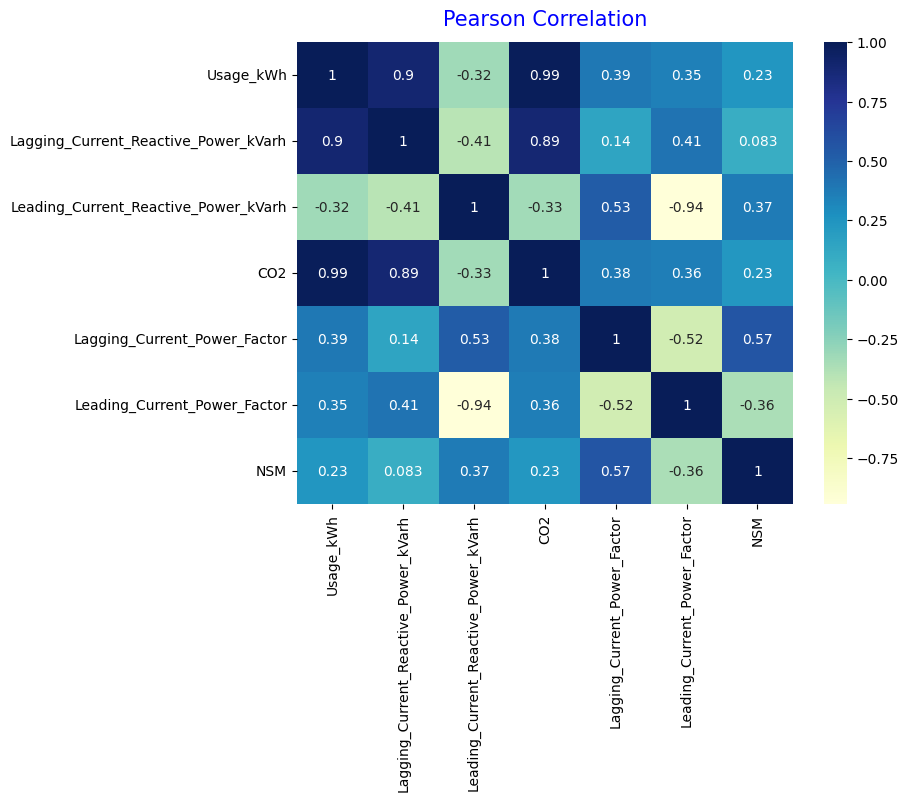

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [46]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

# df = df.set_index('date')
# print(df.index)
#df["date"] =

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# создаем новые поля "hour" и "minute"
# df['time'] = (df['date'].dt.hour * 60. + df['date'].dt.minute)
df['day'] = (df['date'].dt.day)
# df['minute'] = df['date'].dt.minute / 60.

df.drop('date', axis=1, inplace=True)

#handling categorical data
df = pd.get_dummies(df, drop_first=True)

data = df.drop('Usage_kWh', axis=1)
df_norm = (data-data.min())/(data.max()-data.min())
df_norm = df_norm - df_norm.mean()
df_norm = pd.concat((df_norm, df["Usage_kWh"]), 1)
df = df_norm

df.describe()


# train-test split for time series
# train_size = int(len(df) * 0.67)
# test_size = len(df) - train_size
# train, test = df[:train_size], df[train_size:]

# X_train = train.drop('Usage_kWh', axis = 1)
# y_train = train['Usage_kWh']
#
# X_test = test.drop('Usage_kWh', axis = 1)
# y_test = test['Usage_kWh']

# train.head()

/tmp/ipykernel_237769/2686838792.py:24: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, df["Usage_kWh"]), 1)


,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load,Usage_kWh
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,35040.000000
mean,1.297795e-17,1.784468e-17,3.974497e-17,-4.380058e-17,-1.784468e-17,-4.106304e-18,-6.326750e-17,1.784468e-17,1.318073e-17,-6.286194e-18,-6.286194e-18,-6.488975e-18,-6.286194e-18,-6.083414e-18,-2.838926e-18,5.434516e-17,27.386892
std,1.682592e-01,2.674518e-01,2.307260e-01,1.892132e-01,3.045654e-01,2.917022e-01,2.932124e-01,4.513883e-01,3.523129e-01,3.495322e-01,3.495322e-01,3.495322e-01,3.495322e-01,3.495322e-01,4.055471e-01,4.473794e-01,33.444380
min,-1.345102e-01,-1.394434e-01,-1.646323e-01,-8.057806e-01,-8.436787e-01,-5.000000e-01,-4.906849e-01,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,0.000000
25%,-1.107768e-01,-1.394434e-01,-1.646323e-01,-1.725806e-01,1.533213e-01,-2.500000e-01,-2.573516e-01,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,3.200000
50%,-8.291594e-02,-1.394434e-01,-1.646323e-01,7.381944e-02,1.563213e-01,0.000000e+00,9.315068e-03,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,4.570000
75%,9.910862e-02,-6.415521e-02,1.210820e-01,1.844444e-01,1.563213e-01,2.500000e-01,2.426484e-01,7.150685e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,7.232877e-01,51.237500
max,8.654898e-01,8.605566e-01,8.353677e-01,1.942194e-01,1.563213e-01,5.000000e-01,5.093151e-01,7.150685e-01,8.547945e-01,8.575342e-01,8.575342e-01,8.575342e-01,8.575342e-01,8.575342e-01,7.924658e-01,7.232877e-01,157.180000


/tmp/ipykernel_384546/1523684375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


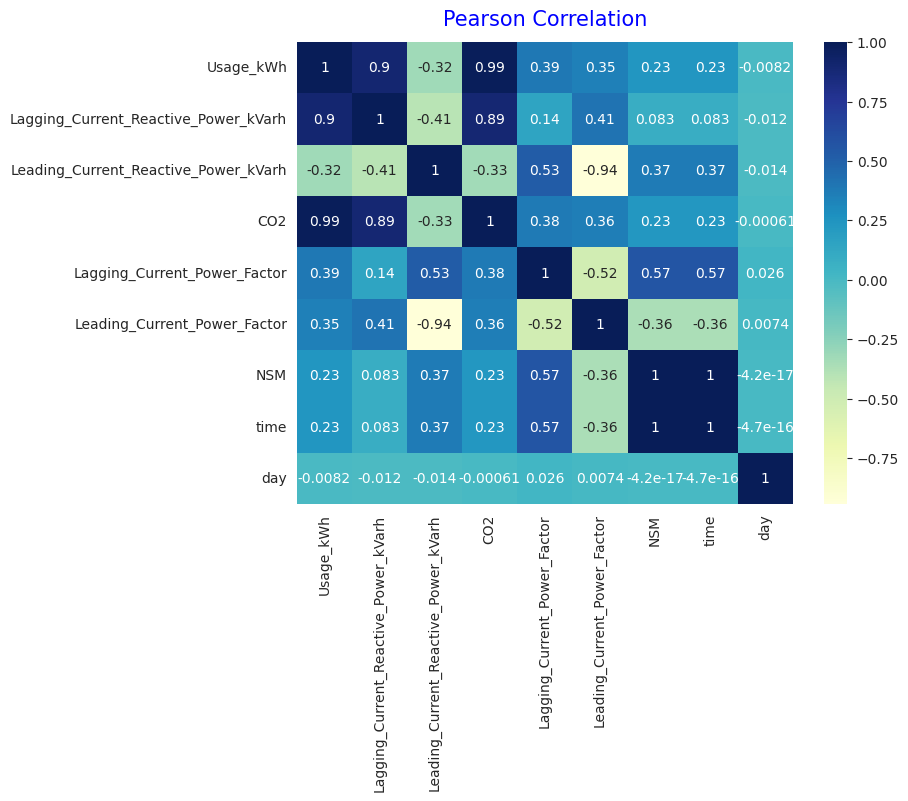

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [9]:
# import pandas as pd
# import numpy as np
#
# # создаем пример DataFrame
# df = pd.DataFrame({'A': [1, 2., 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
#
# # преобразовываем DataFrame в массив NumPy
# array = df.values
#
# print(array)

In [54]:
import torch


def create_dataset(dataset, lookback, shift):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range((len(dataset) - lookback - 1) // shift):
        feature = dataset[i * shift : i *shift + lookback].values
        target = dataset[i * shift + lookback : i * shift + lookback + 1]['Usage_kWh'].values
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

def create_dataset2(dataset, lookback, shift):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range((len(dataset) - lookback - 1) // shift):
        feature = dataset[i * shift : i *shift + lookback].values
        target = dataset[i * shift + lookback : i * shift + lookback + 1]['Usage_kWh'].values
        # if(target[0] < 50):
        #     continue
        X.append(feature)
        y.append(target)
    return X, y


lookback = 8
shift = 4
# X_train, y_train = create_dataset(train, lookback, shift)
# X_test, y_test = create_dataset(test, lookback, shift)
X, y = create_dataset2(df, lookback, shift)
train_size = int(len(X) * 0.67)
test_size = len(df) - train_size

tt = torch.tensor
# import random
# random.shuffle(X)
# random.shuffle(y)

X_train, y_train = tt(X[:train_size]), tt(y[:train_size])
X_test, y_test = tt(X[train_size:]), tt(y[train_size:])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test[0][0][0])


torch.Size([5867, 8, 17]) torch.Size([5867, 1])
torch.Size([2890, 8, 17]) torch.Size([2890, 1])
tensor(-0.0231, dtype=torch.float64)


In [44]:
X_tr_c = torch.clone(X_train)
X_tr_c = torch.reshape(X_tr_c, (5867, 8*17))
tr = torch.cat((y_train, X_tr_c), 1)

t_np = tr.numpy() #convert to Numpy array
tr_df = pd.DataFrame(t_np) #convert to a dataframe
tr_df.to_csv("../data/train_lab3.csv", index=False, header=False) #save to file

tr_df.info

<bound method DataFrame.info of         0         1         2         3         4         5         6    \
0      3.28 -0.104070 -0.139443 -0.164632 -0.073681  0.156321 -0.489474   
1      3.96 -0.088075 -0.139443 -0.164632 -0.158581  0.156321 -0.447368   
2      3.28 -0.096950 -0.139443 -0.164632 -0.136381  0.156321 -0.405263   
3      3.56 -0.083226 -0.139443 -0.164632 -0.182581  0.156321 -0.363158   
4      3.35 -0.095092 -0.139443 -0.164632 -0.154381  0.156321 -0.321053   
...     ...       ...       ...       ...       ...       ...       ...   
5862  26.17 -0.089210 -0.139443 -0.164632 -0.302081  0.156321 -0.236842   
5863  31.46 -0.087663 -0.139443 -0.164632 -0.310281  0.156321 -0.194737   
5864  51.34  0.130684 -0.139443 -0.021775 -0.092281  0.156321 -0.152632   
5865  35.53 -0.052063 -0.139443 -0.021775  0.163419  0.156321 -0.110526   
5866   3.17  0.093949 -0.139443  0.121082  0.112519  0.156321 -0.068421   

           7         8         9    ...       127       128       1

In [48]:
import torch
import torch.nn as nn


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh').double()
        #self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True).double()
        self.fc1 = nn.Linear(hidden_size, hidden_size//2).double()
        self.fc2 = nn.Linear(hidden_size//2, output_size).double()
        self.relu = nn.ReLU().double()
        #self.relu = nn.Tanh().double()

        # for name, param in self.rnn.named_parameters():
        #     if 'weight_ih' in name:
        #         torch.nn.init.xavier_uniform_(param)
        #         print(param.shape)
        #     elif 'weight_hh' in name:
        #         torch.nn.init.orthogonal_(param)
        #         print("here")
        #     elif 'bias' in name:
        #         torch.nn.init.constant_(param, 0.0)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Decode the hidden state of the last time step
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        return out
        # return out[:, -1, :]

In [12]:
learning_rate = 0.01

model = RNNModel(10, 10, 1, 5)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

import torch.utils.data as data

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

for X_batch, y_batch in loader:
    print(X_batch.shape)
    print(y_batch.shape)
    break

# for i in model.parameters():
#     print(i)
#     break

torch.Size([8, 1, 17])
torch.Size([8, 1])


0
Epoch 0: train RMSE 5.2626, test RMSE 4.8449


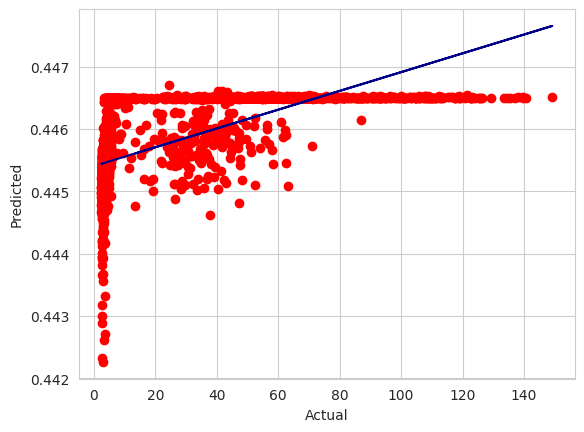

1
Epoch 1: train RMSE 5.0782, test RMSE 4.6439
2
Epoch 2: train RMSE 4.9888, test RMSE 4.5508
3
Epoch 3: train RMSE 4.9808, test RMSE 4.5472
4
Epoch 4: train RMSE 4.9783, test RMSE 4.5484
5
Epoch 5: train RMSE 4.9444, test RMSE 4.5089
6
Epoch 6: train RMSE 4.8837, test RMSE 4.4507
7
Epoch 7: train RMSE 4.7900, test RMSE 4.3677
8
Epoch 8: train RMSE 4.6841, test RMSE 4.2718
9
Epoch 9: train RMSE 4.5607, test RMSE 4.1594
10
Epoch 10: train RMSE 4.4106, test RMSE 4.0198


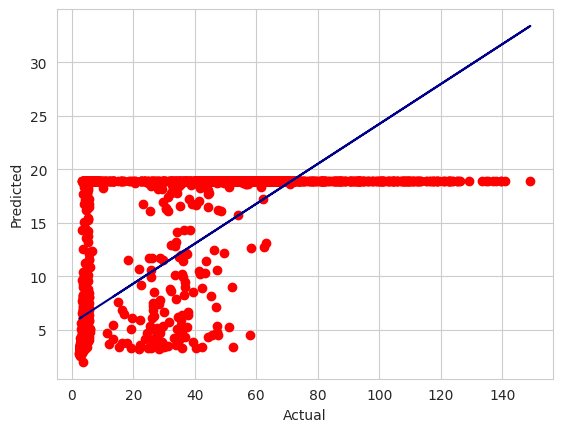

11
Epoch 11: train RMSE 4.2246, test RMSE 3.8423
12
Epoch 12: train RMSE 4.0217, test RMSE 3.6499
13
Epoch 13: train RMSE 3.8216, test RMSE 3.4526
14
Epoch 14: train RMSE 3.6653, test RMSE 3.2935
15
Epoch 15: train RMSE 3.5964, test RMSE 3.2126
16
Epoch 16: train RMSE 3.5394, test RMSE 3.1540
17
Epoch 17: train RMSE 3.5154, test RMSE 3.1417
18
Epoch 18: train RMSE 3.4757, test RMSE 3.1005
19
Epoch 19: train RMSE 3.4786, test RMSE 3.1153
20
Epoch 20: train RMSE 3.4550, test RMSE 3.0889


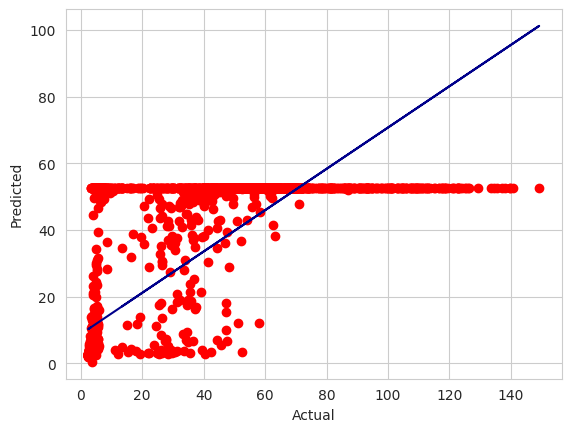

21
Epoch 21: train RMSE 3.4398, test RMSE 3.0738
22
Epoch 22: train RMSE 3.4367, test RMSE 3.0691
23
Epoch 23: train RMSE 3.4396, test RMSE 3.0758
24
Epoch 24: train RMSE 3.4234, test RMSE 3.0516
25
Epoch 25: train RMSE 3.4114, test RMSE 3.0341
26
Epoch 26: train RMSE 3.4063, test RMSE 3.0253
27
Epoch 27: train RMSE 3.3988, test RMSE 3.0242
28
Epoch 28: train RMSE 3.3818, test RMSE 3.0016
29
Epoch 29: train RMSE 3.3626, test RMSE 2.9792
30
Epoch 30: train RMSE 3.1871, test RMSE 2.8025


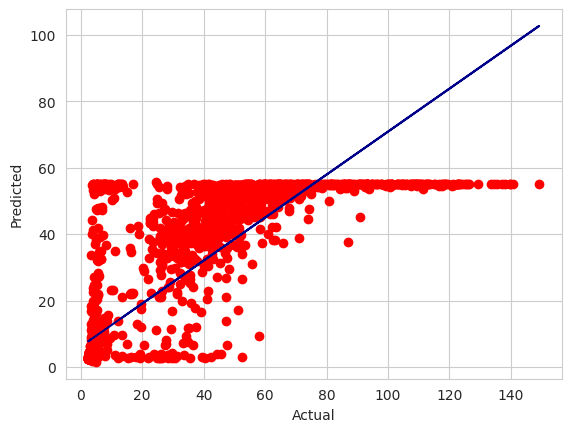

31
Epoch 31: train RMSE 3.1135, test RMSE 2.7524
32
Epoch 32: train RMSE 3.0727, test RMSE 2.7354
33
Epoch 33: train RMSE 3.0415, test RMSE 2.7110
34
Epoch 34: train RMSE 2.9931, test RMSE 2.6920
35
Epoch 35: train RMSE 2.9762, test RMSE 2.6796
36
Epoch 36: train RMSE 2.9435, test RMSE 2.6781
37
Epoch 37: train RMSE 2.9149, test RMSE 2.6680
38
Epoch 38: train RMSE 2.8918, test RMSE 2.6520
39
Epoch 39: train RMSE 2.8850, test RMSE 2.6638
40
Epoch 40: train RMSE 2.8544, test RMSE 2.6334


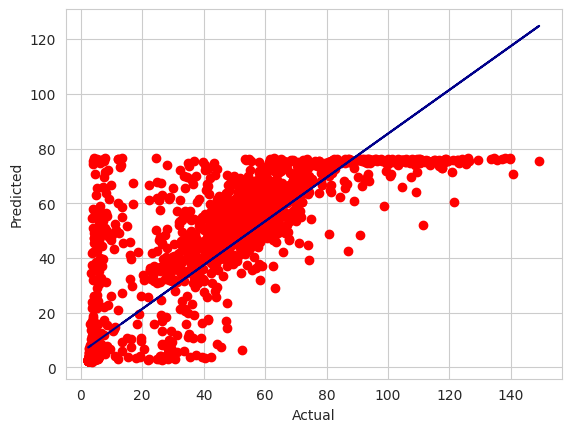

41
Epoch 41: train RMSE 2.8397, test RMSE 2.6194
42
Epoch 42: train RMSE 2.8137, test RMSE 2.6079
43
Epoch 43: train RMSE 2.8123, test RMSE 2.6114
44
Epoch 44: train RMSE 2.7984, test RMSE 2.6012
45
Epoch 45: train RMSE 2.7871, test RMSE 2.5922
46
Epoch 46: train RMSE 2.7790, test RMSE 2.5890
47
Epoch 47: train RMSE 2.7859, test RMSE 2.5981
48
Epoch 48: train RMSE 2.7723, test RMSE 2.5795
49
Epoch 49: train RMSE 2.7697, test RMSE 2.5765
50
Epoch 50: train RMSE 2.7737, test RMSE 2.5811


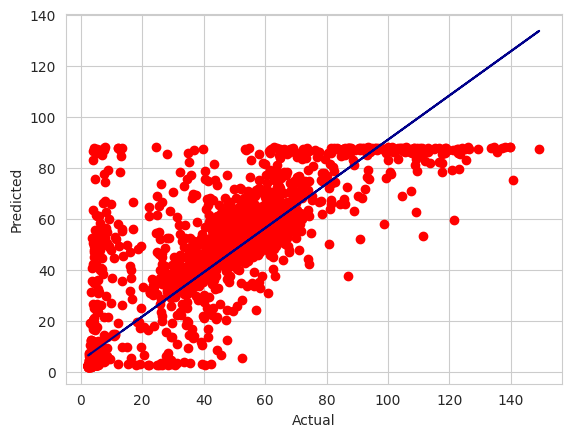

51
Epoch 51: train RMSE 2.7802, test RMSE 2.5894
52
Epoch 52: train RMSE 2.7651, test RMSE 2.5766
53
Epoch 53: train RMSE 2.7713, test RMSE 2.5852
54
Epoch 54: train RMSE 2.7627, test RMSE 2.5777
55
Epoch 55: train RMSE 2.7614, test RMSE 2.5775
56
Epoch 56: train RMSE 2.7704, test RMSE 2.5843
57
Epoch 57: train RMSE 2.7756, test RMSE 2.5867
58
Epoch 58: train RMSE 2.7669, test RMSE 2.5729
59
Epoch 59: train RMSE 2.7650, test RMSE 2.5727
60
Epoch 60: train RMSE 2.7699, test RMSE 2.5699


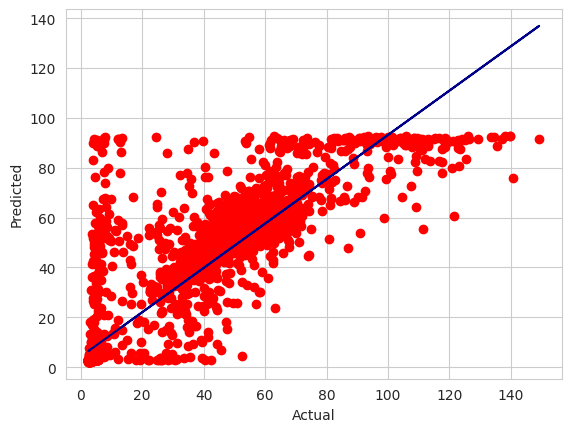

61
Epoch 61: train RMSE 2.7531, test RMSE 2.5613
62
Epoch 62: train RMSE 2.7639, test RMSE 2.5668
63
Epoch 63: train RMSE 2.7500, test RMSE 2.5569
64
Epoch 64: train RMSE 2.7597, test RMSE 2.5645
65
Epoch 65: train RMSE 2.7598, test RMSE 2.5620
66
Epoch 66: train RMSE 2.7442, test RMSE 2.5478
67
Epoch 67: train RMSE 2.7568, test RMSE 2.5619
68
Epoch 68: train RMSE 2.7509, test RMSE 2.5528
69
Epoch 69: train RMSE 2.7485, test RMSE 2.5509
70
Epoch 70: train RMSE 2.7520, test RMSE 2.5526


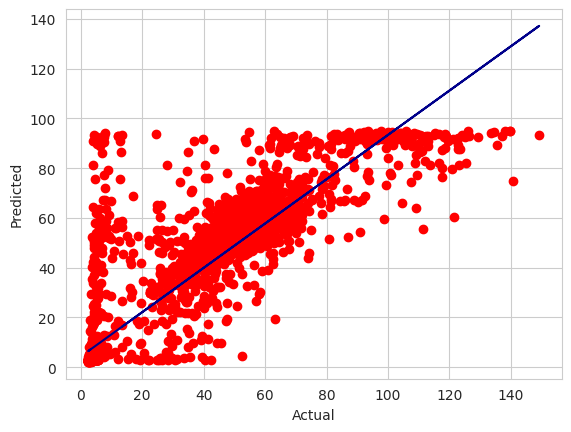

71
Epoch 71: train RMSE 2.7392, test RMSE 2.5441
72
Epoch 72: train RMSE 2.7494, test RMSE 2.5550
73
Epoch 73: train RMSE 2.7483, test RMSE 2.5543
74
Epoch 74: train RMSE 2.7503, test RMSE 2.5528
75
Epoch 75: train RMSE 2.7374, test RMSE 2.5418
76
Epoch 76: train RMSE 2.7389, test RMSE 2.5440
77
Epoch 77: train RMSE 2.7449, test RMSE 2.5473
78
Epoch 78: train RMSE 2.7441, test RMSE 2.5481
79
Epoch 79: train RMSE 2.7319, test RMSE 2.5320
80
Epoch 80: train RMSE 2.7420, test RMSE 2.5457


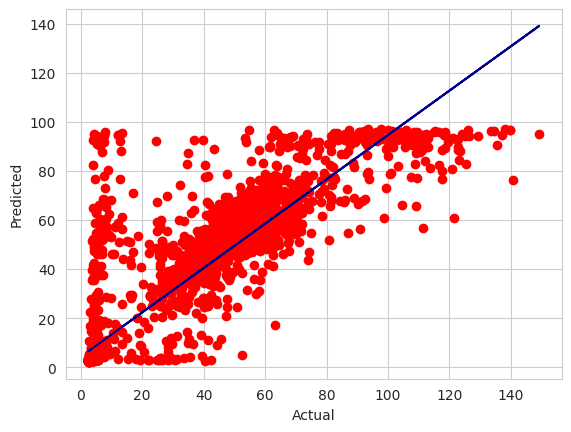

81
Epoch 81: train RMSE 2.7424, test RMSE 2.5465
82
Epoch 82: train RMSE 2.7345, test RMSE 2.5416
83
Epoch 83: train RMSE 2.7348, test RMSE 2.5379
84
Epoch 84: train RMSE 2.7443, test RMSE 2.5477
85
Epoch 85: train RMSE 2.7425, test RMSE 2.5455
86
Epoch 86: train RMSE 2.7309, test RMSE 2.5368
87
Epoch 87: train RMSE 2.7377, test RMSE 2.5465
88
Epoch 88: train RMSE 2.7445, test RMSE 2.5510
89
Epoch 89: train RMSE 2.7417, test RMSE 2.5486
90
Epoch 90: train RMSE 2.7336, test RMSE 2.5381


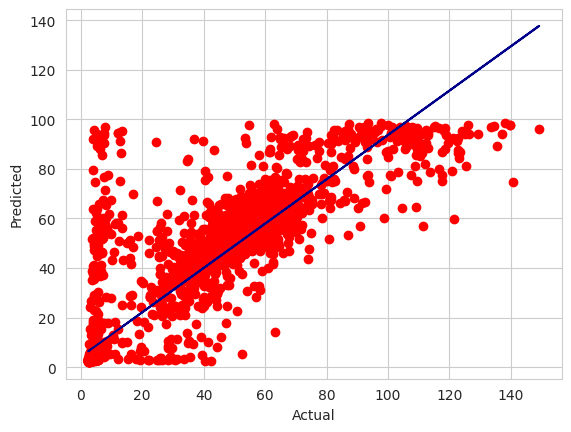

91
Epoch 91: train RMSE 2.7280, test RMSE 2.5344
92
Epoch 92: train RMSE 2.7258, test RMSE 2.5378
93
Epoch 93: train RMSE 2.7334, test RMSE 2.5427
94
Epoch 94: train RMSE 2.7270, test RMSE 2.5398
95
Epoch 95: train RMSE 2.7192, test RMSE 2.5320
96
Epoch 96: train RMSE 2.7202, test RMSE 2.5325
97
Epoch 97: train RMSE 2.7263, test RMSE 2.5382
98
Epoch 98: train RMSE 2.7336, test RMSE 2.5503
99
Epoch 99: train RMSE 2.7395, test RMSE 2.5511
100
Epoch 100: train RMSE 2.7370, test RMSE 2.5488


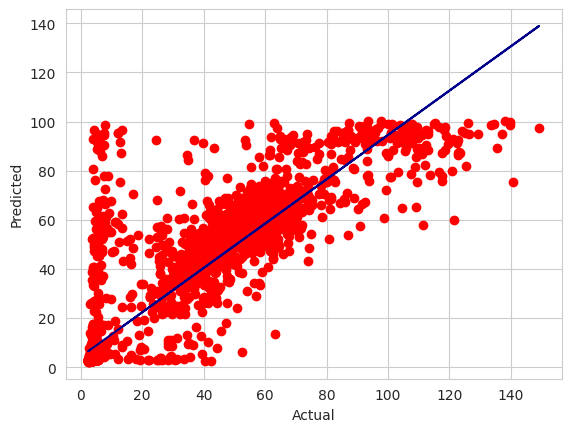

101
Epoch 101: train RMSE 2.7237, test RMSE 2.5403
102
Epoch 102: train RMSE 2.7268, test RMSE 2.5371
103
Epoch 103: train RMSE 2.7344, test RMSE 2.5458
104
Epoch 104: train RMSE 2.7190, test RMSE 2.5340
105
Epoch 105: train RMSE 2.7113, test RMSE 2.5296
106
Epoch 106: train RMSE 2.7140, test RMSE 2.5377
107
Epoch 107: train RMSE 2.7254, test RMSE 2.5426
108
Epoch 108: train RMSE 2.7196, test RMSE 2.5382
109
Epoch 109: train RMSE 2.7175, test RMSE 2.5350
110
Epoch 110: train RMSE 2.7268, test RMSE 2.5420


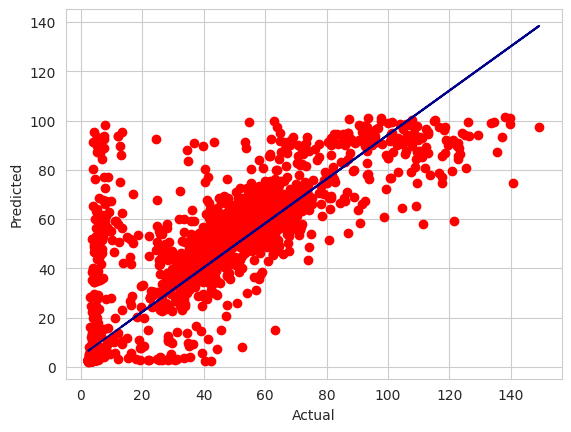

111
Epoch 111: train RMSE 2.7387, test RMSE 2.5476
112
Epoch 112: train RMSE 2.7256, test RMSE 2.5463
113
Epoch 113: train RMSE 2.7109, test RMSE 2.5283
114
Epoch 114: train RMSE 2.7239, test RMSE 2.5440
115
Epoch 115: train RMSE 2.7246, test RMSE 2.5430
116
Epoch 116: train RMSE 2.7113, test RMSE 2.5335
117
Epoch 117: train RMSE 2.7193, test RMSE 2.5409
118


KeyboardInterrupt: 

In [55]:
from tqdm import tqdm

import numpy as np
import torch.optim as optim
import torch.utils.data as data
import time

num_layers = 3

# model = RNNModel(18, 8, 1, num_layers)
model = RNNModel(17, 8, 1, num_layers)

# optimizer = optim.SGD(model.parameters(), lr=0.0000001, momentum=0.9)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.L1Loss() ##nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=False, batch_size=64)

n_epochs = 1000
for epoch in range(n_epochs):
    print(epoch)
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(y_pred)
        #print(X_batch)
        #print(time.sleep(3))
        loss = loss_fn(y_pred, y_batch)
        #print(np.sqrt(loss.detach().numpy()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    #
    # break

    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    if epoch % 10 == 0:
        x = torch.squeeze(y_test).numpy()
        y = y_pred.numpy()

        # plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
        plt.plot(x, y, 'o', color = 'r')

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m * x + b, color = 'darkblue')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show()

    # print(y_pred[:10], y_test[:10])
    # for i in range(100):
    #     print(y_pred[i][0]-y_test[i][0])
    # print(X_test[:10])
    #break